# **EVALUATION**

- **Tujuan Tahap Evaluation**
- Tahap Evaluation bertujuan untuk:
1. Mengukur kinerja model secara kuantitatif
2. Menilai kemampuan generalisasi model terhadap data baru
3. Memastikan model menjawab masalah bisnis
4. Memberikan interpretasi hasil secara ilmiah
5. Evaluation BUKAN hanya menampilkan angka, tetapi menjelaskan makna angka tersebut.

## 1. Import Library & Load Model

In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

In [3]:
# Load processed data
df = pd.read_csv(
    "../data/processed/solar_power_clean.csv",
    parse_dates=["datetime"],
    index_col="datetime"
)

# Load trained model
model = joblib.load("../models/random_forest_model.pkl")

## 2. Pisahkan Fitur & Target

In [4]:
X = df.drop(columns=["SystemProduction"])
y = df["SystemProduction"]

## 3. Time-Based Train-Test Split

In [5]:
split_ratio = 0.7
split_index = int(len(df) * split_ratio)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]


## 4. Lakukan Prediksi

In [6]:
# Prediksi data test
y_pred = model.predict(X_test)

## 5. Metrik Evaluasi

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 5.1 Mean Absolute Error (MAE)

In [8]:
mae = mean_absolute_error(y_test, y_pred)
mae

158.9852057652207

### 5.2 Root Mean Squared Error (RMSE)

In [9]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

499.93960850782554

### 5.3 R-Squared (R²)

In [10]:
r2 = r2_score(y_test, y_pred)
r2

0.5439396995139427

## 6. Ringkasan Hasil Evaluasi

In [11]:
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")

MAE  : 158.985
RMSE : 499.940
R²   : 0.544


## 7. Visualisasi Prediksi vs Aktual

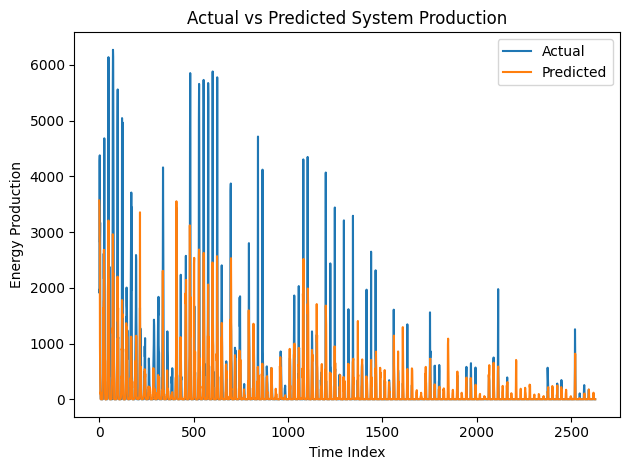

In [12]:
plt.figure()
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted System Production")
plt.xlabel("Time Index")
plt.ylabel("Energy Production")
plt.tight_layout()
plt.show()

## 8. Analisis Kesalahan (Residual Analysis)

In [13]:
residuals = y_test - y_pred

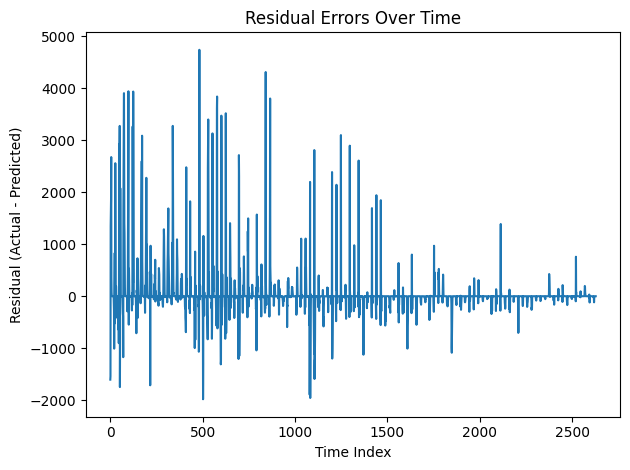

In [14]:
plt.figure()
plt.plot(residuals.values)
plt.title("Residual Errors Over Time")
plt.xlabel("Time Index")
plt.ylabel("Residual (Actual - Predicted)")
plt.tight_layout()
plt.show()